In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
spotify_filepath = '/Users/micah/build/DataVisualisation/input/spotify.csv'

spotify_data = pd.read_csv(spotify_filepath, index_col='Date', parse_dates=True)

In [6]:
spotify_data.head()
spotify_data.tail()

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2018-01-05,4492978,3450315.0,2408365.0,2685857.0,2869783.0
2018-01-06,4416476,3394284.0,2188035.0,2559044.0,2743748.0
2018-01-07,4009104,3020789.0,1908129.0,2350985.0,2441045.0
2018-01-08,4135505,2755266.0,2023251.0,2523265.0,2622693.0
2018-01-09,4168506,2791601.0,2058016.0,2727678.0,2627334.0


<Axes: xlabel='Date'>

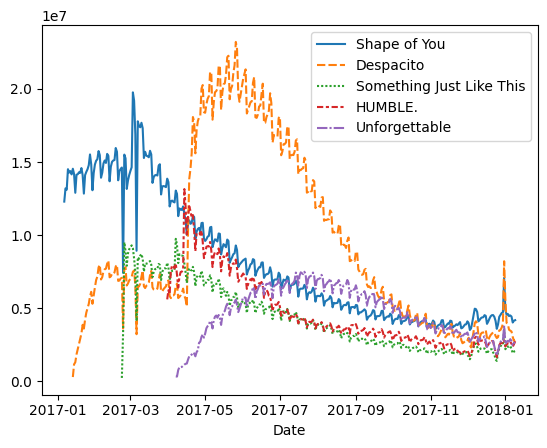

In [7]:
sns.lineplot(data=spotify_data)

<Axes: title={'center': 'Daily global streams of popular songs between 2017-2018'}, xlabel='Date'>

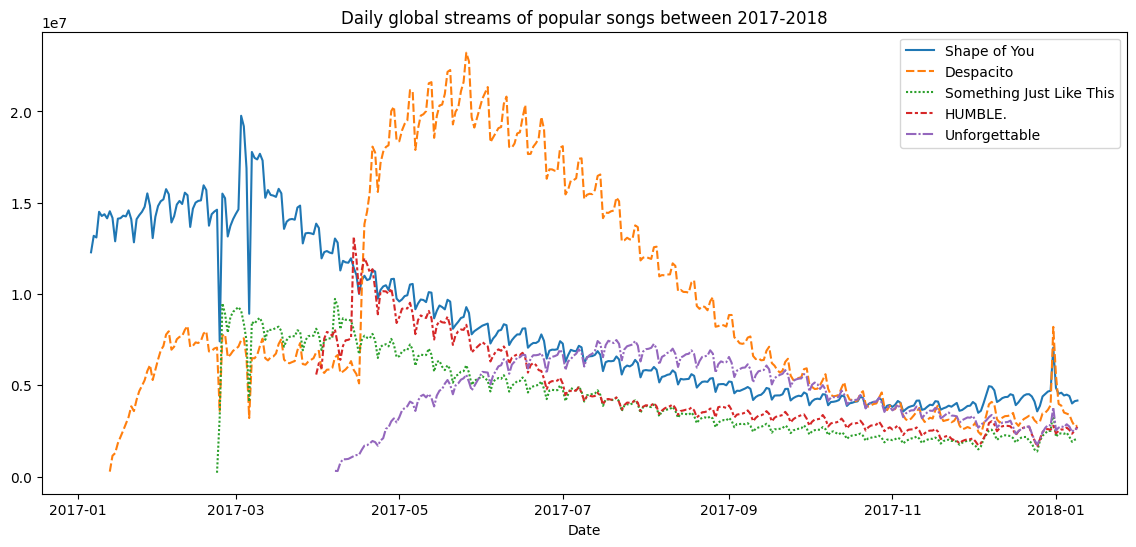

In [9]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title('Daily global streams of popular songs between 2017-2018')

sns.lineplot(data=spotify_data)

In [10]:
list(spotify_data.columns)

['Shape of You',
 'Despacito',
 'Something Just Like This',
 'HUMBLE.',
 'Unforgettable']

Text(0.5, 0, 'Date')

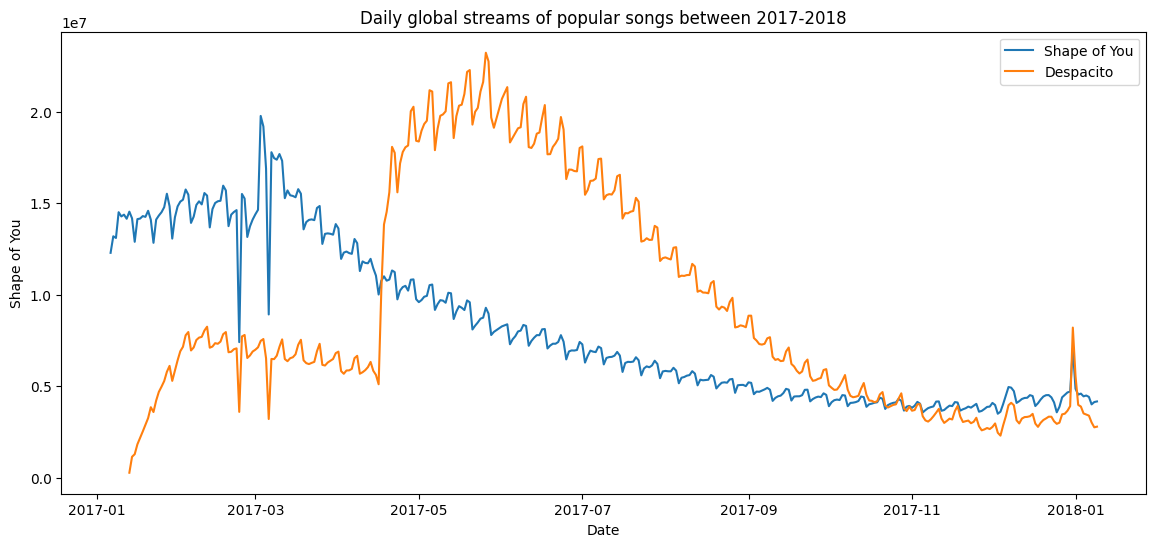

In [11]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title('Daily global streams of popular songs between 2017-2018')

sns.lineplot(data=spotify_data['Shape of You'], label='Shape of You')
sns.lineplot(data=spotify_data['Despacito'], label='Despacito')

# Add label for x axis
plt.xlabel('Date')


In [12]:
museum_filepath='/Users/micah/build/DataVisualisation/input/museum_visitors.csv'
museum_data = pd.read_csv(museum_filepath, index_col='Date', parse_dates=True)

In [13]:
museum_data.head()

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2014-01-01,24778,4486,1581,6602
2014-02-01,18976,4172,1785,5029
2014-03-01,25231,7082,3229,8129
2014-04-01,26989,6756,2129,2824
2014-05-01,36883,10858,3676,10694


In [44]:
specific_date='2018-07-01'
specific_header='America Tropical Interpretive Center'
# Count in July 2018 for America Tropical Interpretive Center
ca_museum_jul18 = museum_data.loc[specific_date, specific_header]

# Differences in count
avila_oct18 = int(museum_data.loc['2018-10-01', 'Avila Adobe']) - int(museum_data.loc['2018-10-01', 'Firehouse Museum'])

<Axes: title={'center': 'Monthly Visitors to LA city Museums'}, xlabel='Date'>

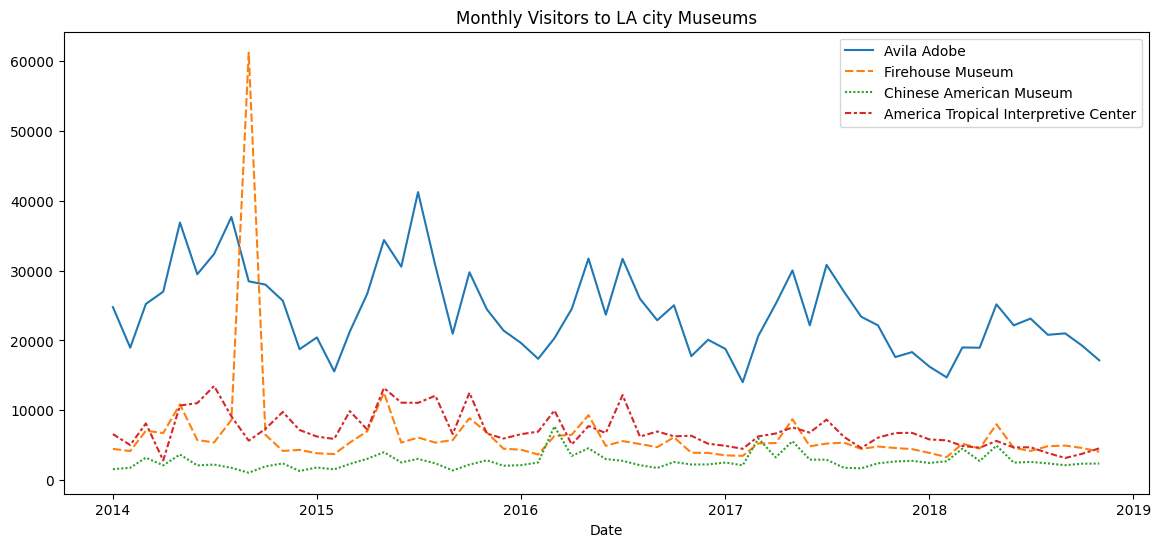

In [43]:
plt.figure(figsize=(14,6))
plt.title('Monthly Visitors to LA city Museums')
sns.lineplot(data=museum_data)

Text(0, 0.5, 'Visitors')

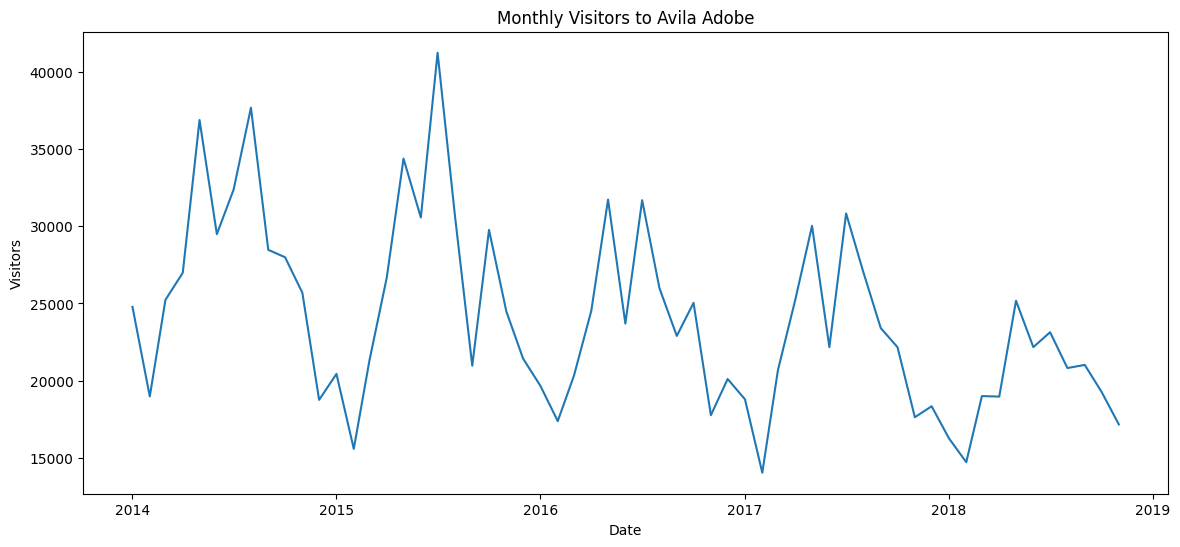

In [48]:
# Create a line chart that shows how the number of visitors to Avila Adobe has evolved over time
plt.figure(figsize=(14,6))
plt.title('Monthly Visitors to Avila Adobe')
sns.lineplot(data=museum_data['Avila Adobe'])
plt.ylabel('Visitors')

In [49]:
def total_values_for_museum_in_date_range(museum_data, museum_name, start_date, end_date):
    # Ensure the start_date and end_date are in datetime format
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # Filter the data within the date range
    filtered_data = museum_data.loc[start_date:end_date]
    
    # Sum the values for the specified museum
    total_values = filtered_data[museum_name].sum()
    
    return total_values



In [52]:
# Total visitor count between certain months for each year,
# however we can can make a general conclusion looking at the patterns in the graph

def total_values_for_museum(museum_data, museum_name, start_month, end_month):
    # Create a mask to filter the months September to February
    month_mask = (museum_data.index.month >= start_month) | (museum_data.index.month <= end_month)
    
    # Filter the data for the specified months
    filtered_data = museum_data[month_mask]
    
    # Sum the values for the specified museum
    total_values = filtered_data[museum_name].sum()
    
    return total_values


sep_feb = total_values_for_museum(museum_data, 'Avila Adobe', 9, 2)
mar_aug = total_values_for_museum(museum_data, 'Avila Adobe', 3, 8)

if (sep_feb>mar_aug):
    print('More staff needed in September to Feburary')
else:
    print('More staff needed in March to August')

More staff needed in March to August
